In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

cifar10 = tf.keras.datasets.cifar10

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


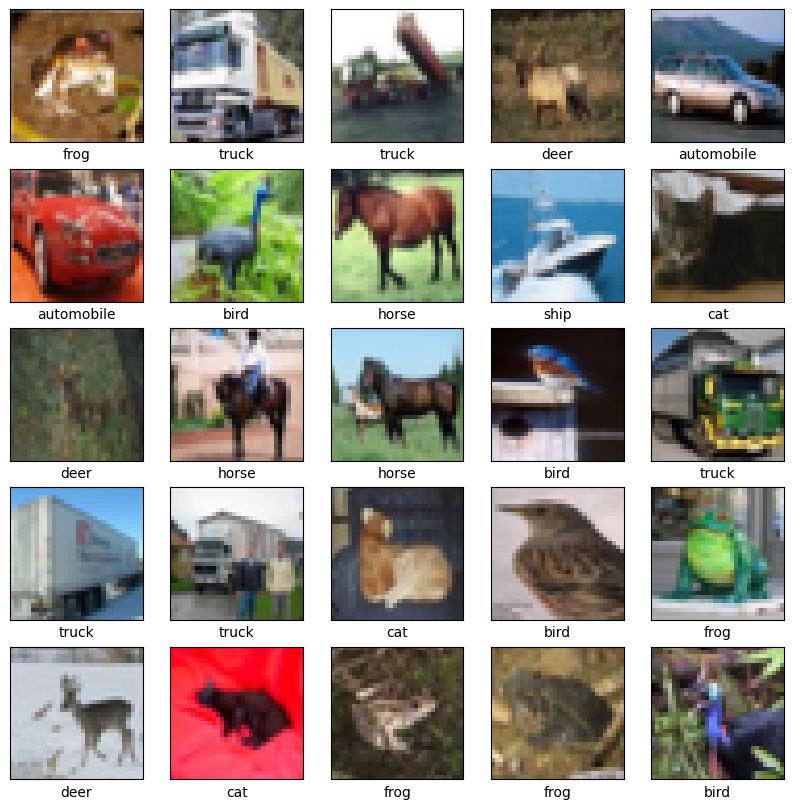

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# Label and plot images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [3]:
# Code taken from https://www.kaggle.com/code/yorkyong/exploring-cifar-10-w-mlp-cnn-resnet
# please dont use in final project
import numpy as np

# Standardize data (?)
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train_standardized = (x_train - x_train_mean) / x_train_std

x_test_standardized = (x_test - x_train_mean) / x_train_std

# Flatten the images
x_train_flat = x_train_standardized.reshape(x_train_standardized.shape[0], -1)
x_test_flat = x_test_standardized.reshape(x_test_standardized.shape[0], -1)

print("Flattened Training Images Shape:", x_train_flat.shape)
print("Flattened Testing Images Shape:", x_test_flat.shape)

Flattened Training Images Shape: (50000, 3072)
Flattened Testing Images Shape: (10000, 3072)


In [4]:
# Code taken from https://www.kaggle.com/code/yorkyong/exploring-cifar-10-w-mlp-cnn-resnet
# * Don't use in final project, just for testing

# Create the model architecture
model1 = tf.keras.models.Sequential(name="MLP_model")

# add layers
model1.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(3072, ))) # 3072 = 32 x 32 x 3 (Image resolution * color channels)
model1.add(tf.keras.layers.Dense(256, activation='relu')) # hidden layer
model1.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

# add down here the convulutional network model

c:\Users\anrme\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# yes this code is stolen again
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model1.summary()



Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# more stolen code
# training the model

history1 = model1.fit(x_train_flat, y_train,
                    epochs=15,  
                    batch_size=128,  
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(x_test_flat, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3451 - loss: 1.8840 - val_accuracy: 0.4446 - val_loss: 1.6344
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4727 - loss: 1.4960 - val_accuracy: 0.4682 - val_loss: 1.5191
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5132 - loss: 1.3756 - val_accuracy: 0.4946 - val_loss: 1.4490
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5508 - loss: 1.2762 - val_accuracy: 0.5198 - val_loss: 1.4048
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5869 - loss: 1.1779 - val_accuracy: 0.5224 - val_loss: 1.4146
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6094 - loss: 1.1150 - val_accuracy: 0.5188 - val_loss: 1.4170
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6360 - loss: 1.0325 - val_accuracy: 0.5286 - val_loss: 1.4409
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6631 - loss: 0.9562 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


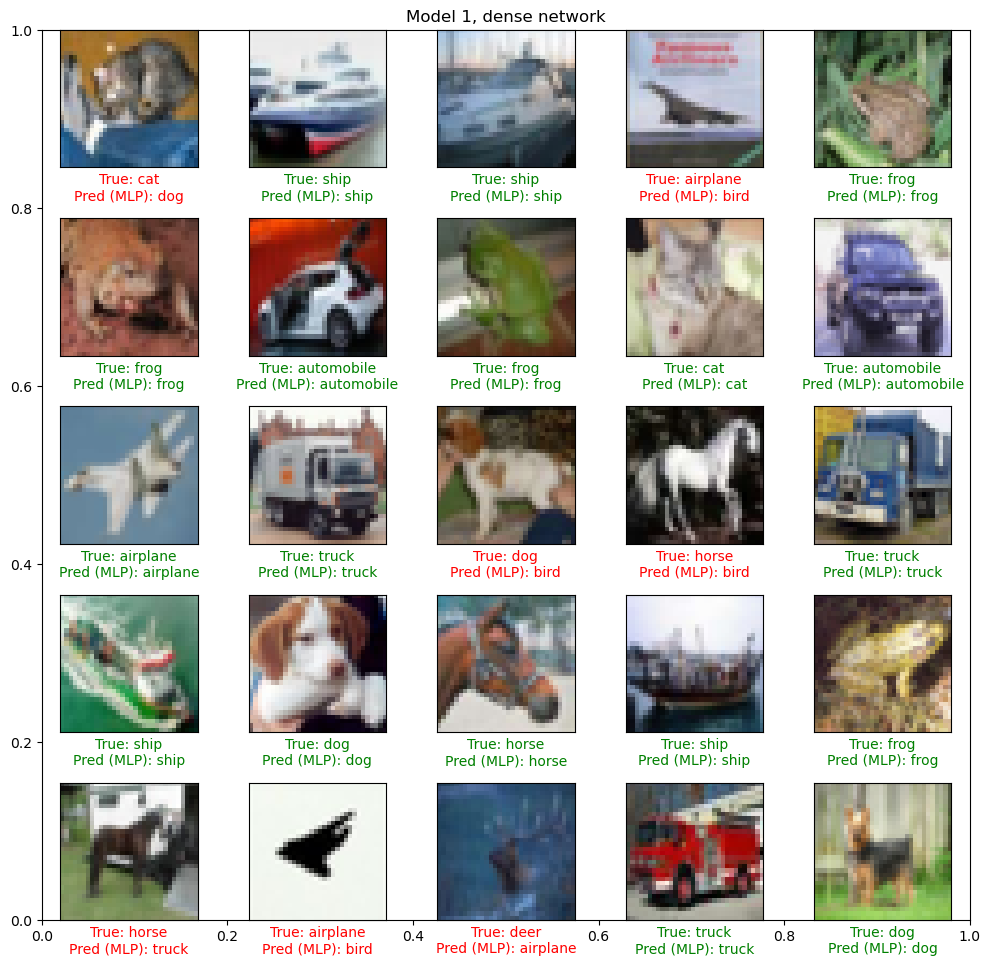

In [8]:
# * don't use in final project
# checking the accuracy

# Get predictions for the test set
predictions_mlp = model1.predict(x_test_flat)
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
plt.title("Model 1, dense network")
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]  # Get predicted label
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

In [ ]:
# notice the normal dense network really only gets so good, probably should use something else (or just use more epochs)